# COVID-19
千葉県市川市の感染データを解析します。

## データの読み込み

In [1]:
import pandas as pd

df = pd.read_csv('corona.csv')

In [2]:
df

,分類,市内,県内,年,性別,職業,推定感染経路,発症日,検査確定日,死亡日,行動歴
0,患者,1,6,20,男性,会社員,,2020/2/2,2020/2/13,NaN,
1,患者,2,7,70,女性,無職,ジム関係,2020/2/14,2020/2/20,NaN,
2,患者,3,9,60,女性,教員,ジム関係,2020/2/12,2020/2/21,NaN,
3,患者,4,13,60,男性,無職,クルーズ船,2020/2/22,2020/2/25,NaN,
4,患者,5,16,80,女性,無職,ジム関係,2020/2/16,2020/3/3,NaN,
5,患者,6,17,50,男性,会社員,,2020/2/24,2020/3/5,NaN,
6,患者,7,18,50,男性,福祉事業所職員,福祉事業所関係,2020/2/24,2020/3/6,NaN,
7,患者,8,19,80,女性,無職,福祉事業所関係,2020/2/26,2020/3/6,NaN,
8,患者,9,20,60,男性,無職,県内19家族,2020/3/1,2020/3/6,NaN,
9,患者,10,21,60,女性,無職,県内19家族,2020/3/2,2020/3/6,NaN,


In [3]:
df["発症日"] = df["発症日"].replace("不明", "")
df["発症日"] = df["発症日"].replace("調査中", "")
df["発症日"] = pd.to_datetime(df["発症日"], format="%Y-%m-%d")

df["検査確定日"] = df["検査確定日"].replace("不明", "")
df["検査確定日"] = df["検査確定日"].replace("調査中", "")
df["検査確定日"] = pd.to_datetime(df["検査確定日"], format="%Y-%m-%d")

df["死亡日"] = df["死亡日"].replace("不明", "")
df["死亡日"] = df["死亡日"].replace("調査中", "")
df["死亡日"] = pd.to_datetime(df["死亡日"], format="%Y-%m-%d")

In [4]:
df.dtypes

分類                object
市内                 int64
県内                 int64
年                  int64
性別                object
職業                object
推定感染経路            object
発症日       datetime64[ns]
検査確定日     datetime64[ns]
死亡日       datetime64[ns]
行動歴               object
dtype: object

## 要約統計量

In [5]:
df.describe().loc[:,"年"]

count    198.000000
mean      42.626263
std       24.456980
min        0.000000
25%       20.000000
50%       40.000000
75%       60.000000
max       90.000000
Name: 年, dtype: float64

## ヒストグラム

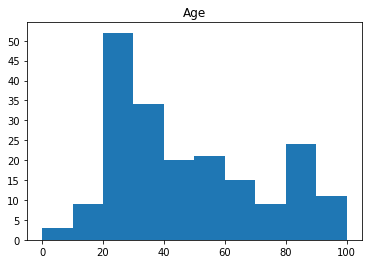

In [6]:
# 年齢
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Age")
plt.yticks([0,5,10,15,20,25,30,35,40,45,50])
plt.hist(df["年"], range=(0, 100));

C:\Users\mine\Anaconda3\envs\Everything\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


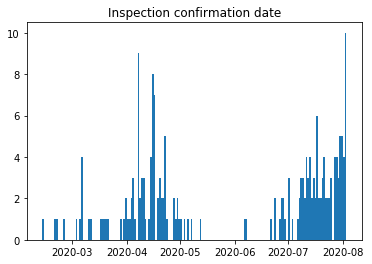

In [7]:
# 検査確定日
days = (df["検査確定日"].max()-df["検査確定日"].min()).days

plt.title("Inspection confirmation date")
hist = plt.hist(df["検査確定日"], bins=days)

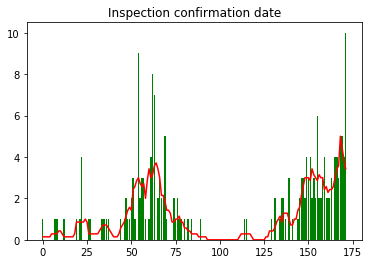

In [8]:
# 移動平均（7日）
import numpy as np

left = np.array(range(days))

num = 7
b = np.ones(num) / num
y2 = np.convolve(hist[0], b, mode='same')

plt.title("Inspection confirmation date")
plt.bar(left, hist[0], color='green');
plt.plot(y2, color='red')